# Feature Matching

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
def display(img, cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [27]:
reeses = cv2.imread('../DATA/harry.png')#0

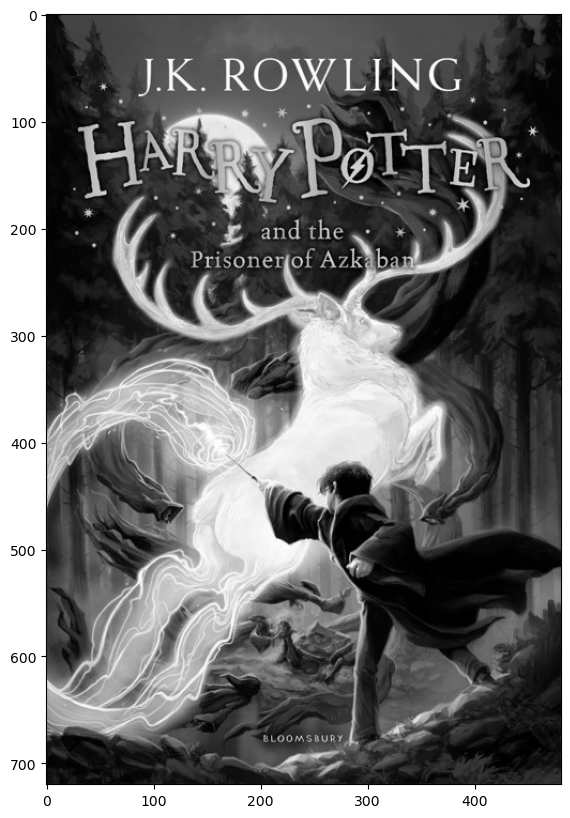

In [28]:
display(reeses)

In [29]:
cereals = cv2.imread('../DATA/harrys.png')#0

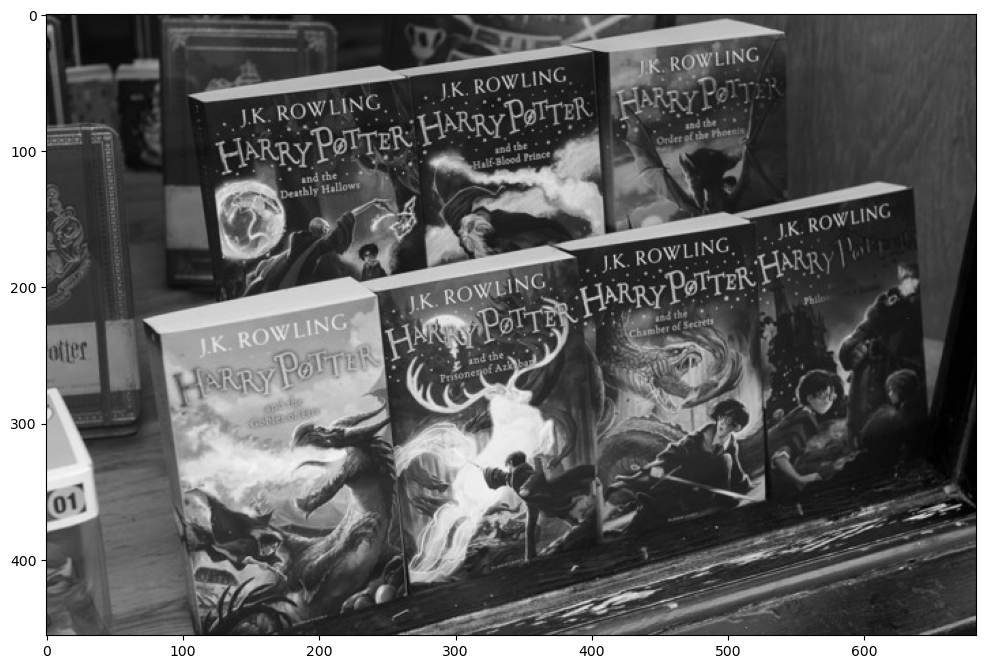

In [31]:
display(cereals)

# Brute Force Detection with ORB Descriptors

In [32]:
# Initiate ORB Detector
orb = cv2.ORB_create()

In [33]:
# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(reeses,None)
kp2, des2 = orb.detectAndCompute(cereals,None)

In [34]:
kp1[:3]

(< cv2.KeyPoint 000001DAC7785840>,
 < cv2.KeyPoint 000001DAC7311090>,
 < cv2.KeyPoint 000001DAC73F9810>)

In [35]:
des1[:2]

array([[ 83, 169, 175,  14, 138, 192, 137, 132, 234,  81, 138, 204, 164,
        230, 204, 102, 166, 103, 125, 221, 155,  73, 191, 113, 153,  52,
        142, 250, 128,   2, 179, 124],
       [  2, 191, 123, 152, 126, 129, 191, 234,  62,  84, 120, 167,  60,
        238,  54,   0, 255, 155,  19, 199, 246,  27,  30, 127, 124,  12,
         11, 110,  93, 129, 103, 217]], dtype=uint8)

In [36]:
# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=True)

# Match descriptors
matches = bf.match(des1,des2)

# Sort them in the order of their distance
matches = sorted(matches, key = lambda x: x.distance)

# Draw first 25 matches
reeses_matches = cv2.drawMatches(reeses,kp1,cereals,kp2,matches[:25], None,flags=2)


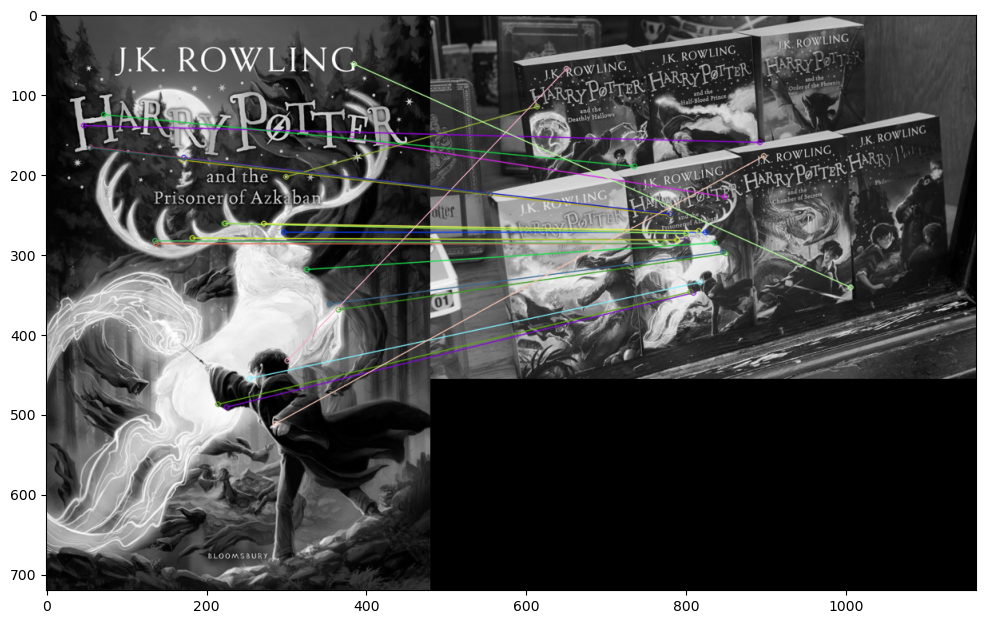

In [37]:
display(reeses_matches)

# Brute-Force Matching with SIFT Descriptors and Ratio Test

In [38]:
# Create SIFT Object
# sift = cv2.xfeatures2d.SIFT_create()
sift = cv2.SIFT_create()

# # find the keypoints and descriptors with ORB
kp1, des1 = sift.detectAndCompute(reeses,None)
kp2, des2 = sift.detectAndCompute(cereals,None)

# BFMatcher with default params
bf = cv2.BFMatcher()

# Match descriptors
matches = bf.knnMatch(des1,des2,k=2)

# Apply ratio test
good = []
for match1,match2 in matches:
    if match1.distance < 0.75*match2.distance:
        good.append([match1])
        
# cv2.drawMatchesKnn expects list of lists as matches
sift_mathces = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None,flags=2)

In [39]:
len(good)

188

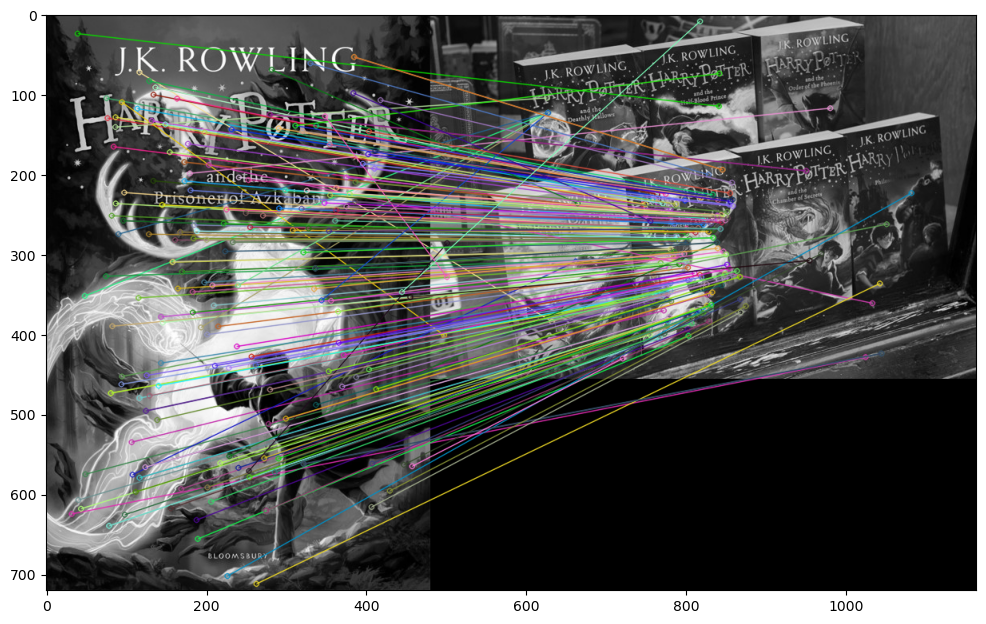

In [40]:
display(sift_mathces)

# FLANN Based Matcher

In [41]:
# Create SIFT Object
# sift = cv2.xfeatures2d.SIFT_create()
sift = cv2.SIFT_create()

# # find the keypoints and descriptors with ORB
kp1, des1 = sift.detectAndCompute(reeses,None)
kp2, des2 = sift.detectAndCompute(cereals,None)

# FLANN parameters
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)

flann = cv2.FlannBasedMatcher(index_params,search_params)

matches = flann.knnMatch(des1,des2,k=2)

good = []
# ratio test

for i, (match1,match2) in enumerate(matches):
    if match1.distance < 0.7*match2.distance:
        good.append([match1])
        
flann_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None, flags=2)

In [42]:
len(good)

153

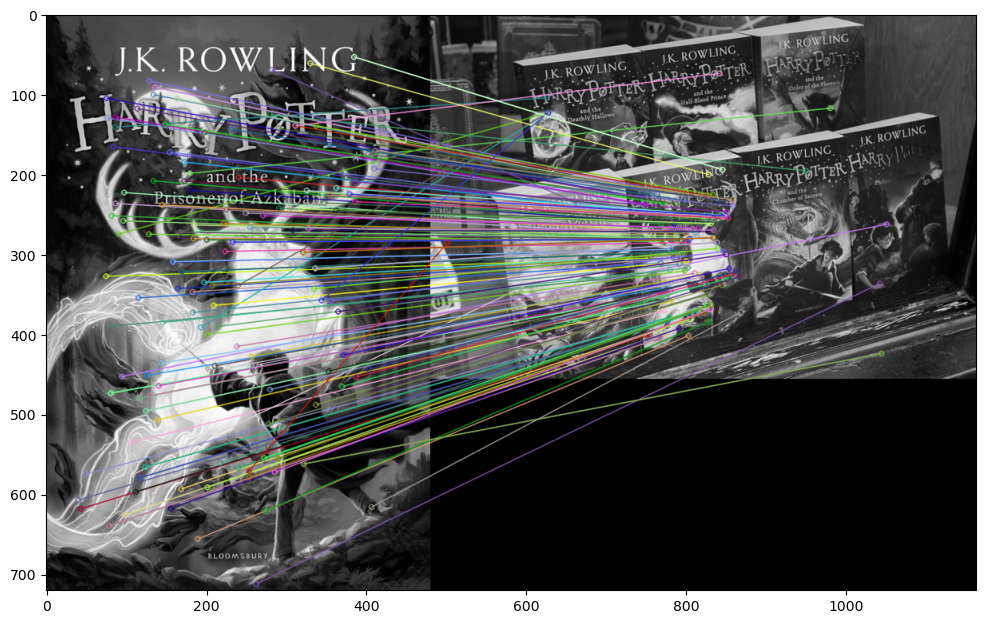

In [43]:
display(flann_matches)

In [44]:
# Create SIFT Object
# sift = cv2.xfeatures2d.SIFT_create()
sift = cv2.SIFT_create()
# # find the keypoints and descriptors with ORB
kp1, des1 = sift.detectAndCompute(reeses,None)
kp2, des2 = sift.detectAndCompute(cereals,None)

# FLANN parameters
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)

flann = cv2.FlannBasedMatcher(index_params,search_params)

matches = flann.knnMatch(des1,des2,k=2)

matchesMask = [[0,0] for i in range(len(matches))]

# ratio test

for i, (match1,match2) in enumerate(matches):
    if match1.distance < 0.7*match2.distance:
        matchesMask[i] = [1,0]
        
draw_params = dict(matchColor = (0,255,0),
                  singlePointColor = (255,0,0),
                  matchesMask = matchesMask,
                  flags = 0)
        
flann_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,matches,None,**draw_params)

In [45]:
len(matchesMask)

2342

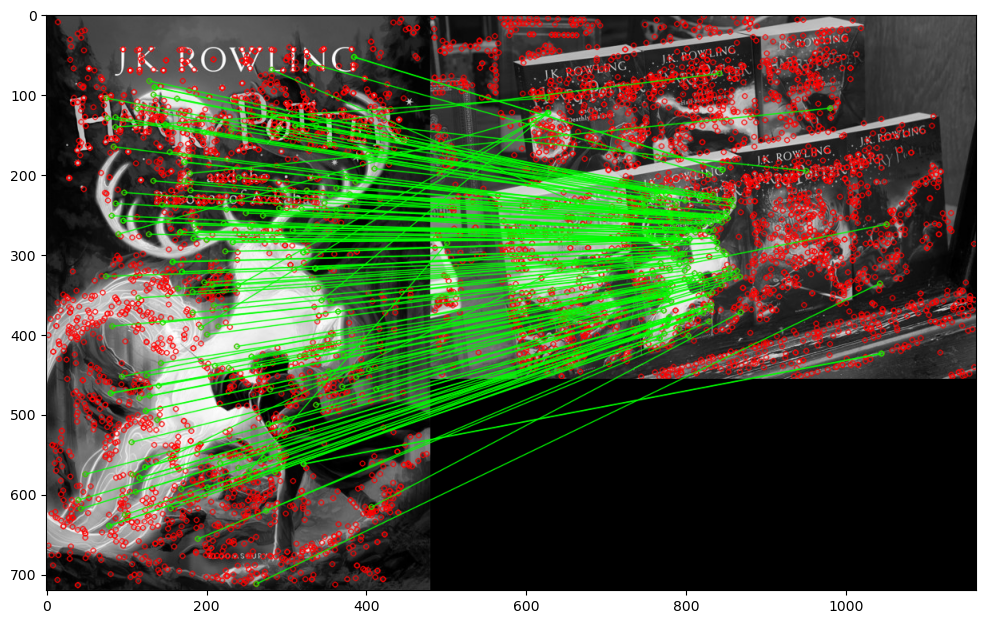

In [46]:
display(flann_matches)

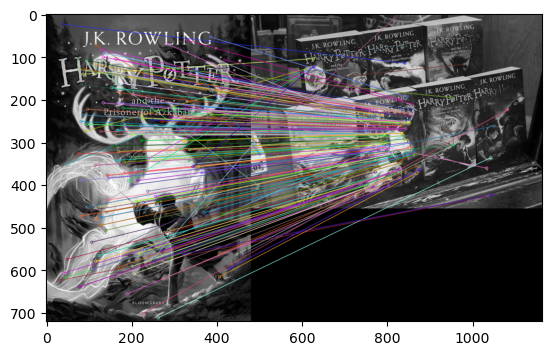

(<matplotlib.image.AxesImage at 0x1dac73f5b50>, None)

In [47]:
#Brute-Force Matching with SIFT Descriptors and Ratio Test
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
img1 = cv.imread('../DATA/harry.png',cv.IMREAD_GRAYSCALE)          # queryImage
img2 = cv.imread('../DATA/harrys.png',cv.IMREAD_GRAYSCALE) # trainImage
# Initiate SIFT detector
sift = cv.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
# BFMatcher with default params
bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)
# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])
# cv.drawMatchesKnn expects list of lists as matches.
img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()

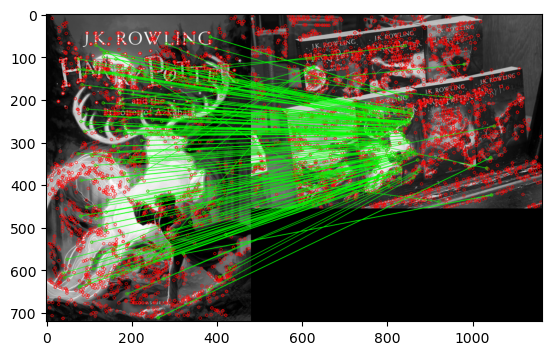

(<matplotlib.image.AxesImage at 0x1dac73c6460>, None)

In [23]:
#FLANN based Matcher
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
img1 = cv.imread('../DATA/harry.png',cv.IMREAD_GRAYSCALE)          # queryImage
img2 = cv.imread('../DATA/harrys.png',cv.IMREAD_GRAYSCALE) # trainImage
# Initiate SIFT detector
sift = cv.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
# FLANN_INDEX_LSH = 6
# index_params= dict(algorithm = FLANN_INDEX_LSH,
#                    table_number = 6, # 12
#                    key_size = 12,     # 20
#                    multi_probe_level = 1) #2
search_params = dict(checks=50)   # or pass empty dictionary or 100
flann = cv.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)
# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]
# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]
draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = cv.DrawMatchesFlags_DEFAULT)
img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)
plt.imshow(img3,),plt.show()

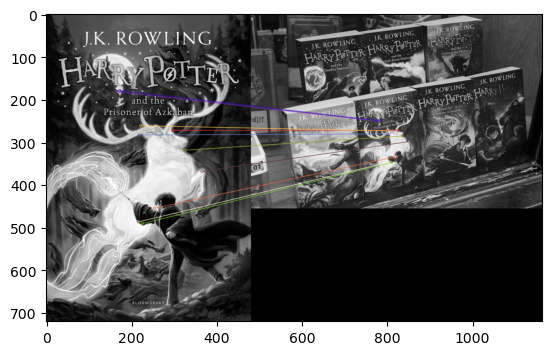

(<matplotlib.image.AxesImage at 0x1dac7281a60>, None)

In [24]:
#Brute-Force Matching with ORB Descriptors
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
img1 = cv.imread('../DATA/harry.png',cv.IMREAD_GRAYSCALE)          # queryImage
img2 = cv.imread('../DATA/harrys.png',cv.IMREAD_GRAYSCALE) # trainImage
# Initiate ORB detector
orb = cv.ORB_create()
# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

# create BFMatcher object
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
# Match descriptors.
matches = bf.match(des1,des2)
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
# Draw first 10 matches.
img3 = cv.drawMatches(img1,kp1,img2,kp2,matches[:10],None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()